In [22]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

movie = pd.read_csv("../data/movie.csv")
titanic = pd.read_csv("../data/titanic_train.csv")

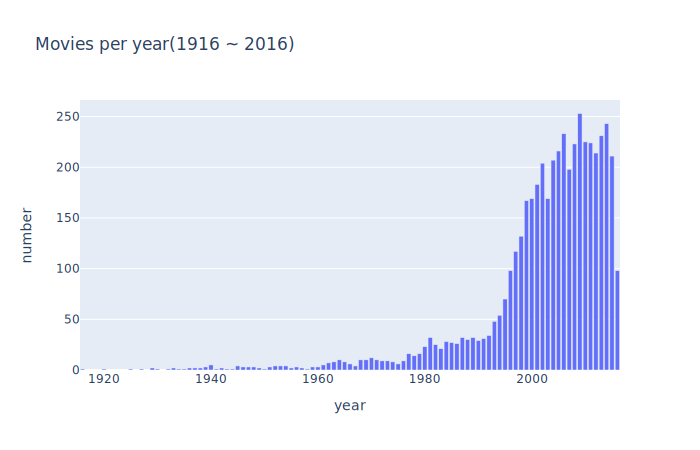

In [23]:
fig = go.Figure(
    data=[go.Bar(x= movie["title_year"].value_counts().index, y=movie["title_year"].value_counts().values)],
    layout_title_text="Movies per year(1916 ~ 2016)"
)

fig.update_layout(xaxis_title="year", yaxis_title= "number")
fig.show("svg")

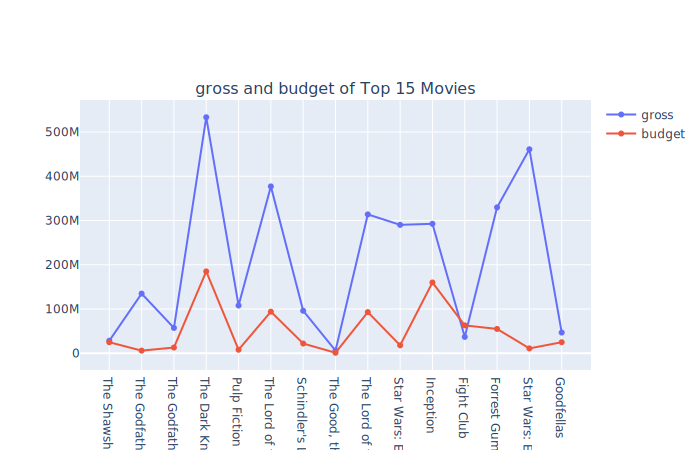

In [24]:
fig = make_subplots(
    rows=1, cols=1,
    subplot_titles=(["gross and budget of Top 15 Movies"]))

df = movie[["gross", "budget", "imdb_score", "movie_title"]]
df.dropna(axis=0, inplace=True)
df.sort_values(by="imdb_score", ascending = False, inplace= True)
fig.add_trace(go.Scatter(x=df["movie_title"].head(15), y=df["gross"].head(15), name = "gross"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df["movie_title"].head(15), y=df["budget"].head(15), name = "budget"),
              row=1, col=1)

fig.update_layout(height=500, width=1000)

fig.show("svg")

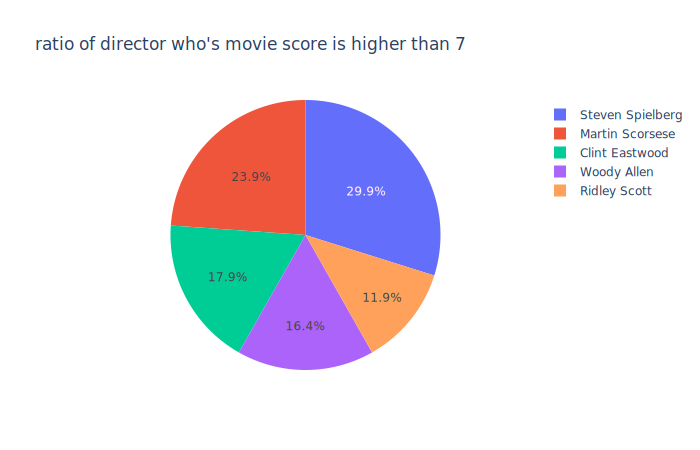

In [25]:
s = movie[movie["imdb_score"] > 7]["director_name"].value_counts().head(5)
labels = s.index
values = s.values

fig = go.Figure(data=[go.Pie(labels=labels, values=values)], layout_title_text = "ratio of director who's movie score is higher than 7")
fig.show("svg")